Data analysis online retail store 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

EDA

In [2]:
df = pd.read_excel("./online_retail_II.xlsx", sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [3]:
df.info()
#Here we see that Description and Customer ID are less

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()
#Here we find out that - 
#Quantity Min value is -ve 
#Price MIn Value is -ve 

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [5]:
df.describe(include="O")#(object type only)
#stock code does not align with Description

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df["Customer ID"].isna()].head(10)
#many Quantities are -ve
#these rows wil be deleted as invalid cust ids wont be taken into account 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
df[df["Quantity"]<0].head(5)
#invoices starting with C resultsin cancelation as emntioned by the data set

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [8]:
df["Invoice"]=df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False] #Will showcase 6 digit invoice number Exactly dependingon true or false 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [9]:
df["Invoice"].str.replace("[0-9]","",regex=True).unique()
#we get an unexpected A instead of cancelation C type invoice 


array(['', 'C', 'A'], dtype=object)

In [10]:
df[df["Invoice"].str.startswith("A")] #we are getting only 3 record , looks like accounting maybe?

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
df["StockCode"]=df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) ]
#the information provided by dataset wass not all true , there are 6 digit stock ode as well 


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [12]:
#looking for if there are stock codes that are Not 5 digit and also dont contain a letter or repeated letters 
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)].drop_duplicates(subset="StockCode")

#PADS seem to be the only one that is valid , like actual cushions pads

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.000,12682.0,France
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.000,15299.0,United Kingdom
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.830,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.650,NaN,United Kingdom
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.190,NaN,United Kingdom
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.000,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.350,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.480,NaN,United Kingdom
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.000,14156.0,EIRE
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.000,16703.0,United Kingdom


DATA CLEANING

In [13]:
cleaned_df=df.copy()
cleaned_df.head()
100-(len(cleaned_df)/len(df)*100)

0.0

In [14]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")
mask =(
    cleaned_df["Invoice"].str.match("^\\d{6}$")== True #Invoices must match this pattern
)

cleaned_df=cleaned_df[mask]
cleaned_df
len(cleaned_df)/len(df)

0.9805713459229134

In [15]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")
mask =(
    (cleaned_df["StockCode"].str.match("^\\d{5}$")== True) #StocCodes must match this pattern
   |(cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==True)
   |(cleaned_df["StockCode"].str.match("^PADS$")==True) 
)

cleaned_df = cleaned_df[mask]
cleaned_df.head(10)
len(cleaned_df)/len(df)

0.9758973548940835

In [16]:
cleaned_df.dropna(subset=["Customer ID"], inplace =True)
len(cleaned_df)/len(df)


0.7732962103752705

In [17]:
cleaned_df.describe()
#Qty min value is 1 which is good 
#Price is also not -ve but the price is 0??


,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [18]:
len(cleaned_df[cleaned_df["Price"]==0])
#it could be that these items were given for free to the customer , hence regarding that we will remove it 
cleaned_df = cleaned_df[cleaned_df["Price"]>0]
cleaned_df.describe()
#price is very very low but no free items 

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [19]:
cleaned_df.info() #The data looks clean 

<class 'pandas.core.frame.DataFrame'>
Index: 406309 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406309 non-null  object        
 1   StockCode    406309 non-null  object        
 2   Description  406309 non-null  object        
 3   Quantity     406309 non-null  int64         
 4   InvoiceDate  406309 non-null  datetime64[ns]
 5   Price        406309 non-null  float64       
 6   Customer ID  406309 non-null  float64       
 7   Country      406309 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [20]:
len(cleaned_df)/len(df)

0.7732429238325965

about 23 percent data was lost because of customer id NAN

Feature Engineering 

In [21]:
cleaned_df["Sales"]=cleaned_df["Quantity"]*cleaned_df["Price"]
cleaned_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [22]:
aggregate_df=cleaned_df.groupby(by="Customer ID", as_index=False).agg(
    
    MonetaryValue = ("Sales", "sum"),
    Frequency= ("Invoice", "nunique"),
    LastInvoiceDate= ("InvoiceDate", "max")    
)

aggregate_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
count,4285.000000,4285.000000,4285.000000,4285
mean,15356.806768,2024.126801,4.426138,2010-09-11 00:06:10.431738624
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00
25%,13891.000000,307.560000,1.000000,2010-07-27 14:39:00
50%,15362.000000,702.900000,2.000000,2010-10-19 12:10:00
75%,16840.000000,1704.290000,5.000000,2010-11-22 11:24:00
max,18287.000000,349164.350000,183.000000,2010-12-09 20:01:00
std,1699.839258,8813.945538,7.938017,NaN


In [23]:
maxInvoiceDate=aggregate_df["LastInvoiceDate"].max()
aggregate_df["Recency"] = (maxInvoiceDate - aggregate_df["LastInvoiceDate"]).dt.days
aggregate_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,4285.000000,4285.000000,4285.000000,4285,4285.000000
mean,15356.806768,2024.126801,4.426138,2010-09-11 00:06:10.431738624,89.548191
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13891.000000,307.560000,1.000000,2010-07-27 14:39:00,17.000000
50%,15362.000000,702.900000,2.000000,2010-10-19 12:10:00,51.000000
75%,16840.000000,1704.290000,5.000000,2010-11-22 11:24:00,135.000000
max,18287.000000,349164.350000,183.000000,2010-12-09 20:01:00,373.000000
std,1699.839258,8813.945538,7.938017,NaN,96.359872


outliers are bad for the data , centroids might not even find that outliers, so to get and observe outliers we will use Histogams

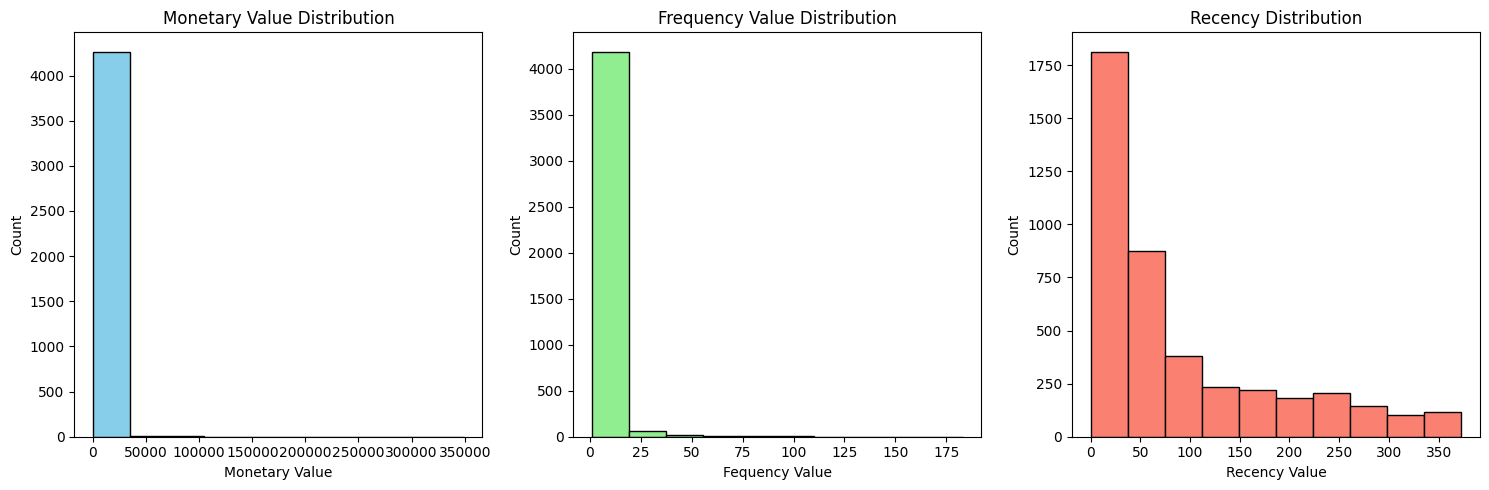

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(aggregate_df["MonetaryValue"], bins=10,color="skyblue",edgecolor="black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregate_df["Frequency"],bins=10,color="lightgreen",edgecolor="black")
plt.title("Frequency Value Distribution")
plt.xlabel("Fequency Value")
plt.ylabel("Count")


plt.subplot(1,3,3)
plt.hist(aggregate_df["Recency"],bins=10,color="Salmon",edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency Value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


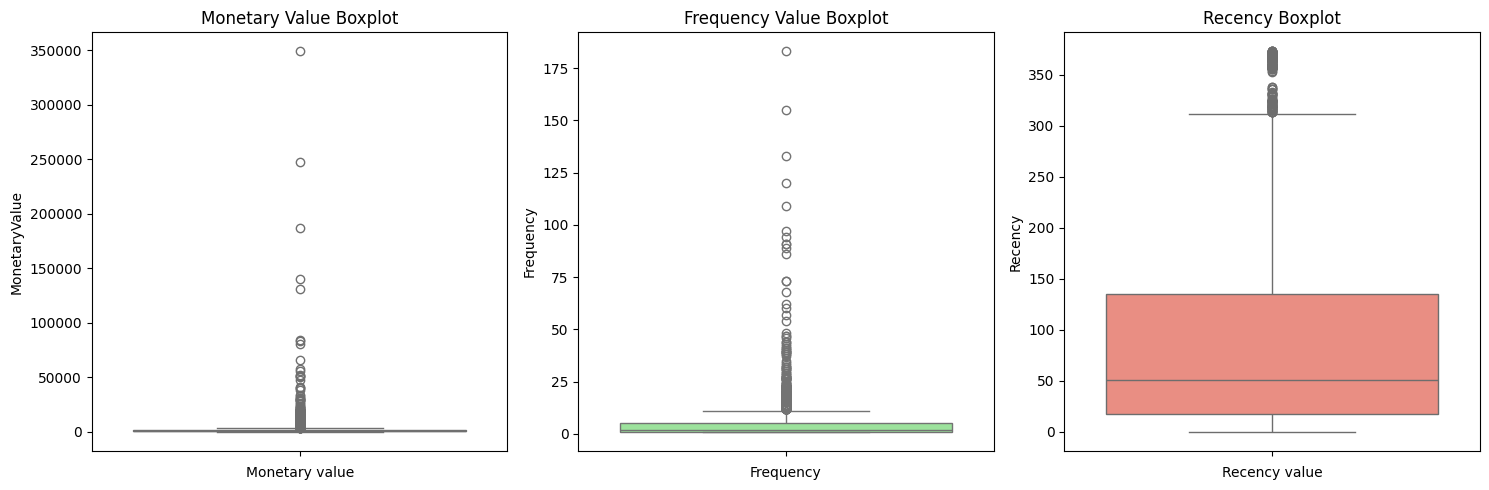

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregate_df['MonetaryValue'], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary value")

plt.subplot(1,3,2)
sns.boxplot(data=aggregate_df['Frequency'], color="lightgreen")
plt.title("Frequency Value Boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(data=aggregate_df['Recency'], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency value")

plt.tight_layout()
plt.show()


In [26]:
M_Q1 = aggregate_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregate_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3-M_Q1

Monwtary_outliers_df = aggregate_df[(aggregate_df["MonetaryValue"]>(M_Q3 +1.5*M_IQR))|(aggregate_df["MonetaryValue"]<(M_Q1 - 1.5*M_IQR) )].copy() #basically the top outliers
Monwtary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [27]:
F_Q1 = aggregate_df["Frequency"].quantile(0.25)
F_Q3 = aggregate_df["Frequency"].quantile(0.75)
F_IQR = F_Q3-F_Q1

FrequencyOutliers_df = aggregate_df[(aggregate_df["Frequency"]>(F_Q3 +1.5*F_IQR))|(aggregate_df["Frequency"]<(F_Q1 - 1.5*F_IQR) )].copy() #basically the top outliers
FrequencyOutliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [ ]:
R_Q1 = aggregate_df["Recency"].quantile(0.25)
R_Q3 = aggregate_df["Recency"].quantile(0.75)
R_IQR = R_Q3-R_Q1

RecencyOutliers_df = aggregate_df[(aggregate_df["Recency"]>(R_Q3 +1.5*R_IQR))|(aggregate_df["Recency"]<(R_Q1 - 1.5*R_IQR) )].copy() #basically the top outliers
RecencyOutliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,167.000000,167.000000,167.000000,167,167.000000
mean,15429.029940,418.318868,1.251497,2009-12-23 13:52:27.664670720,350.970060
min,12439.000000,2.950000,1.000000,2009-12-01 10:49:00,314.000000
25%,14115.500000,147.350000,1.000000,2009-12-07 13:03:00,328.500000
50%,15413.000000,231.900000,1.000000,2009-12-14 15:07:00,360.000000
75%,16812.000000,356.175000,1.000000,2010-01-14 23:56:00,367.000000
max,18201.000000,9471.500000,7.000000,2010-01-29 14:22:00,373.000000
std,1629.838337,950.151329,0.796971,NaN,20.513124


In [ ]:
non_outliers_df = aggregate_df[(~aggregate_df.index.isin(Monwtary_outliers_df.index))&(~aggregate_df.index.isin(FrequencyOutliers_df.index))].copy()

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


#NOW we re plot the box plots using the non- outlier dataset

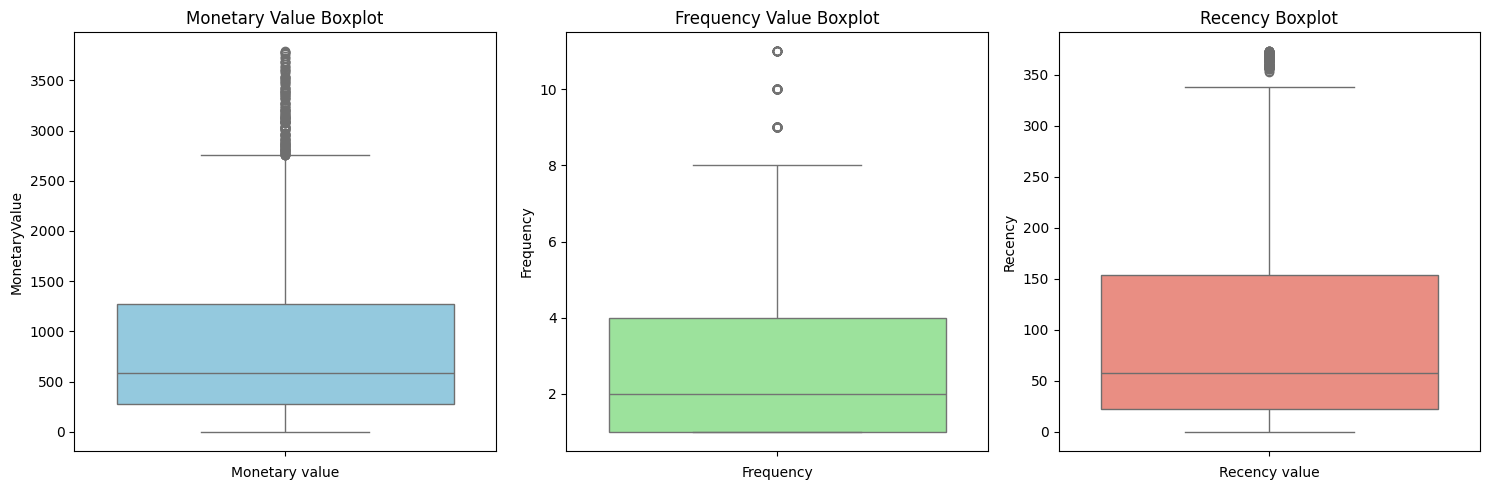

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary value")

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df['Frequency'], color="lightgreen")
plt.title("Frequency Value Boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df['Recency'], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency value")

plt.tight_layout()
plt.show()


outliers still exist in the monetary section but the box is way better than what we got before

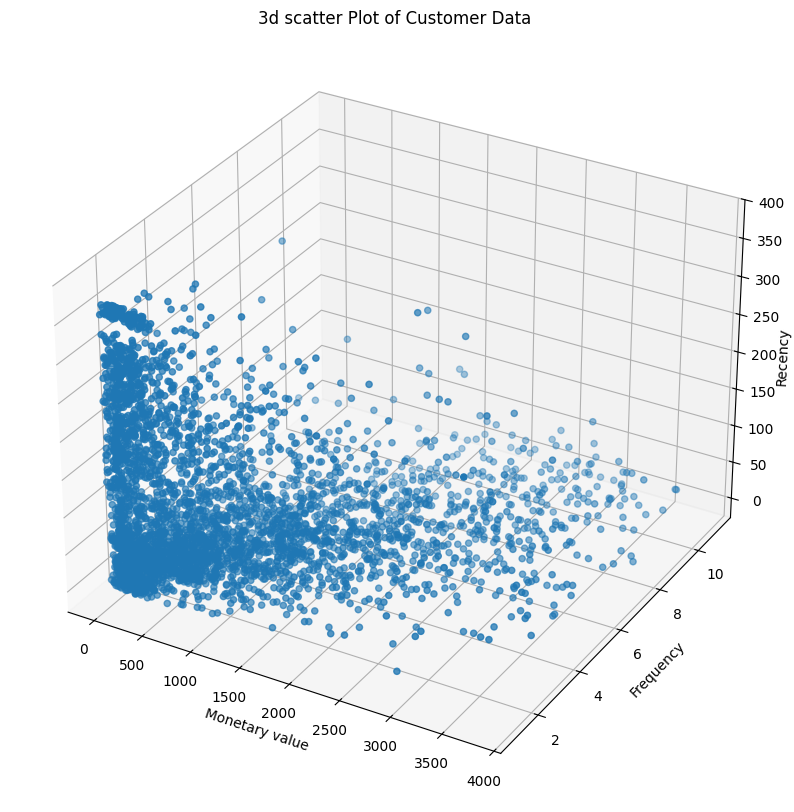

In [31]:
fig = plt.figure(figsize =(10,10))

ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel("Monetary value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency", labelpad=-1)

ax.set_title("3d scatter Plot of Customer Data")
plt.show()

All the features are in different scales , monetary in 1000's , frequency in 100's amd recency in ones, Therefore the centroid will dramatically drift towards Monetary value, but that would not be right , as one feature woill be emphasized, Here we will uise a Z score or standard scaling to rescale  our data 

z = (x-mean)/std where x is our data point ; our data is pretty much normallly distruibuted so z score works 

In [32]:
scalar = StandardScaler()

scaled_data = scalar.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [33]:
#Converting the multidimensional array into a Dataframe

scaled_data_df=pd.DataFrame(scaled_data, index=non_outliers_df.index,columns=("MonetaryValue","Frequency","Recency") )
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


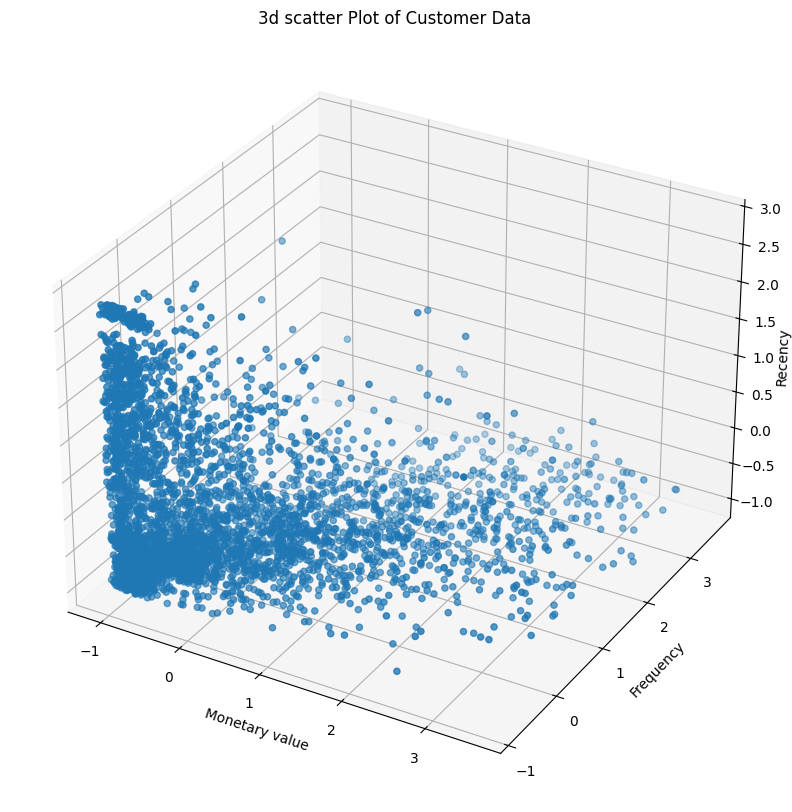

In [34]:
fig = plt.figure(figsize =(10,10))

ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel("Monetary value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency", labelpad=-1)

ax.set_title("3d scatter Plot of Customer Data")
plt.show()

K Means Clustering

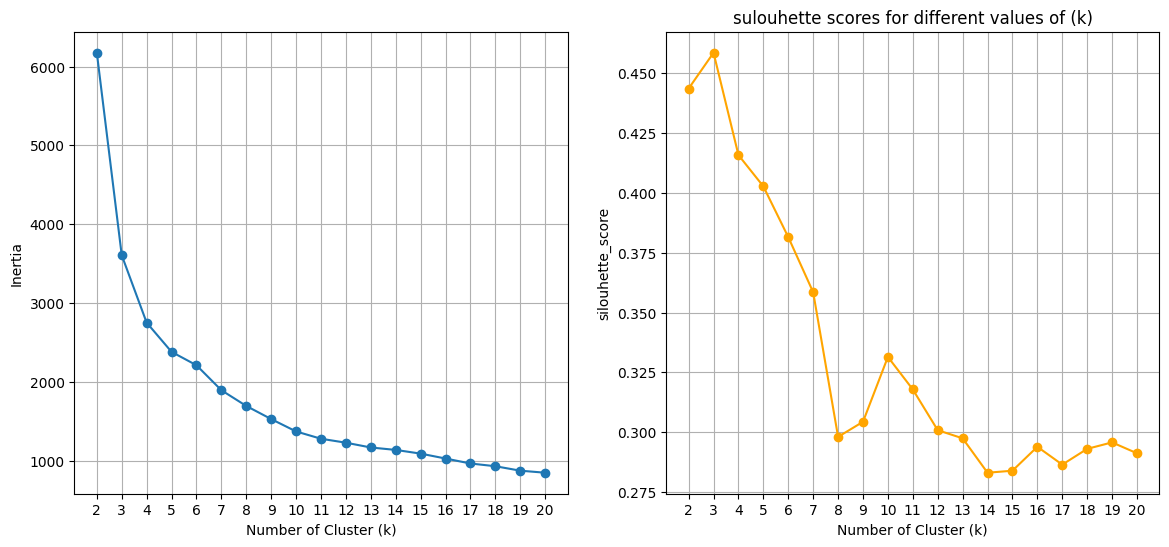

In [44]:
#using elbow method to see how many clusters are approprate

max_k=20
inertia=[]
silouhette_scores=[]
k_values=range(2,max_k+1)

for k in k_values:
    kmeans=KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_lables= kmeans.fit_predict(scaled_data_df)
    sil_score= silhouette_score(scaled_data_df, cluster_lables)
    silouhette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o')
plt.xlabel("Number of Cluster (k)")
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values,silouhette_scores,marker='o', color="orange")
plt.title("sulouhette scores for different values of (k)")
plt.xlabel("Number of Cluster (k)")
plt.ylabel('silouhette_score')
plt.xticks(k_values)
plt.grid(True)

plt.show()

using inertia method or elbow method we found out that at the elbow 4,5,6 are the number of clusters that we will take, and using silouhette score we found that 4 has a higher sil score than 5 and 6 both , hence we will take 4 

In [45]:
kmeans= KMeans(n_clusters=4, max_iter=1000, random_state=42)
cluster_lables = kmeans.fit_predict(scaled_data_df)
cluster_lables

array([1, 0, 2, ..., 1, 0, 0])

In [46]:
non_outliers_df["Cluster"]=cluster_lables
non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


Cluster code

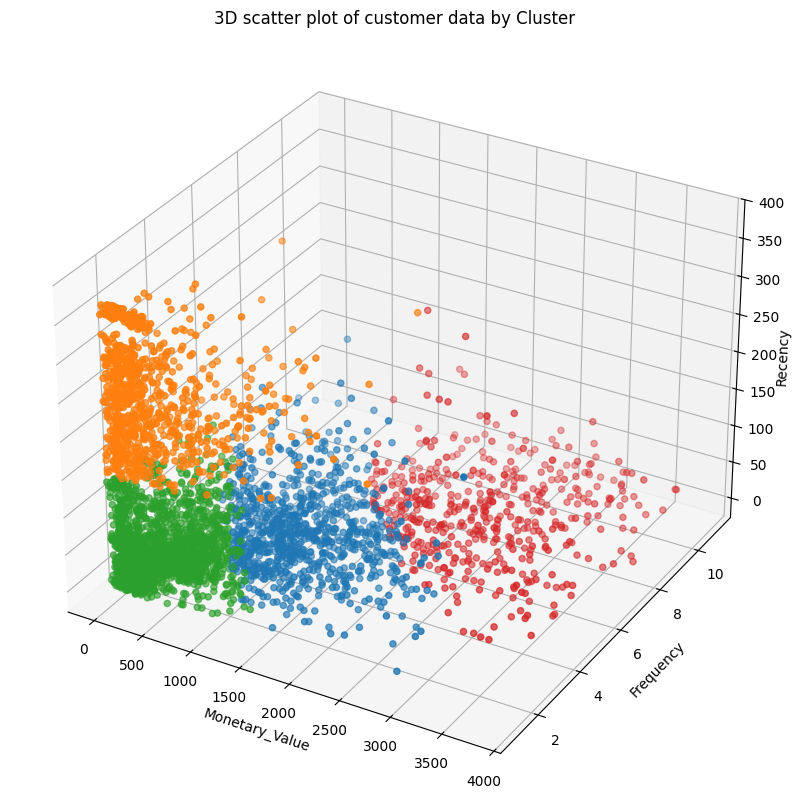

In [49]:
cluster_colors ={0:'#1f77b4',#Blue
                 1:'#ff7f0e',#Orange
                 2:"#2ca02c",#Green
                 3:"#d62728"}#Red
colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"],
                     non_outliers_df["Frequency"],
                     non_outliers_df["Recency"],
                     c=colors, marker='o')
ax.set_xlabel("Monetary_Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency", labelpad=-1)
ax.set_title("3D scatter plot of customer data by Cluster")
plt.show()